In [2]:
import os
os.chdir('..')

HDF5 File Structure:
  Dataset: image_patches, Shape: (256, 201, 256, 256), Type: uint16
  Dataset: mask_patches, Shape: (256, 1, 256, 256), Type: uint8

Attributes:
  description: Image and mask patches with nanometer scale metadata.
  mask_info: class:0 (FITC: 80nm)
Sample 1 - showing slice 100 of 201
Sample 1 - showing first mask class of 1


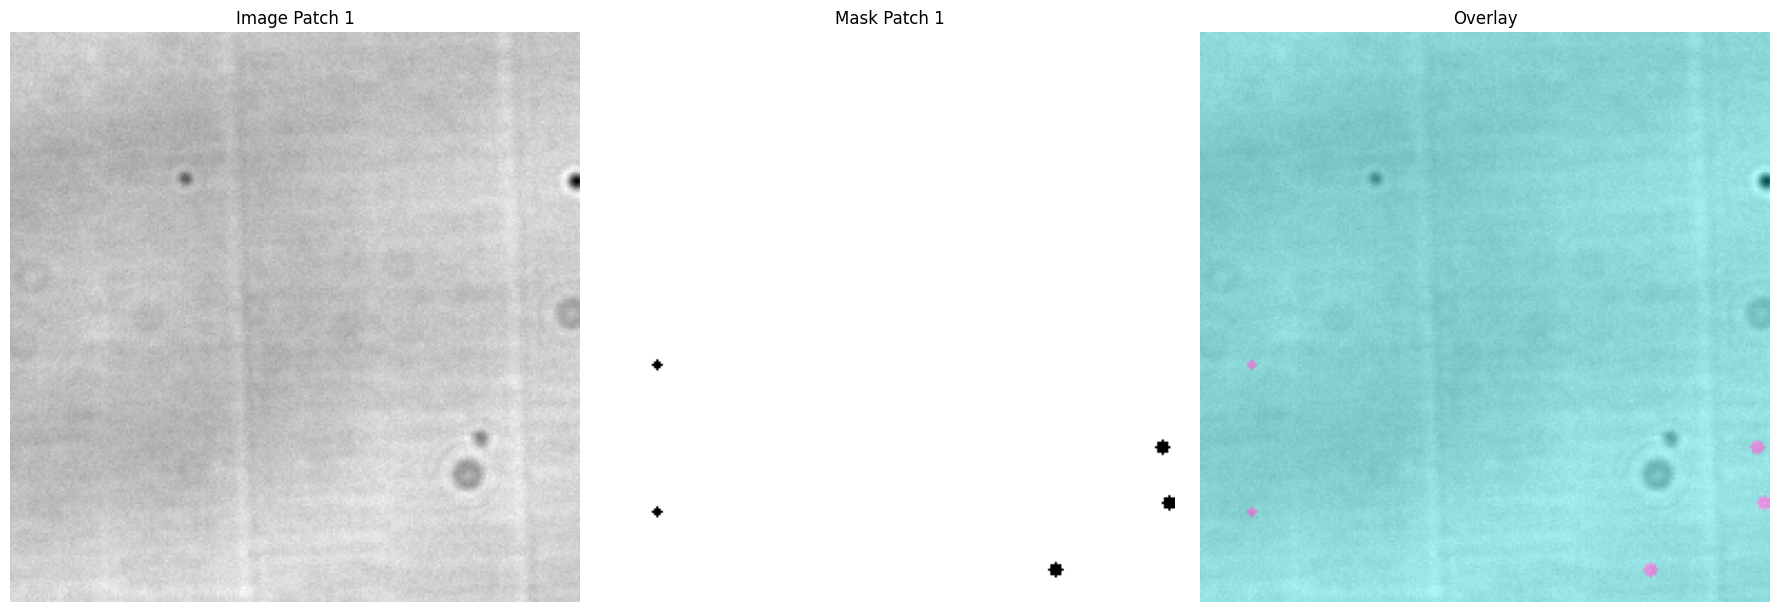

Image stats - Min: 15336, Max: 27407, Mean: 24680.06
Mask stats - Min: 0, Max: 1, Sum: 112 pixels
Percentage of mask area: 0.17%

---

Sample 2 - showing slice 100 of 201
Sample 2 - showing first mask class of 1


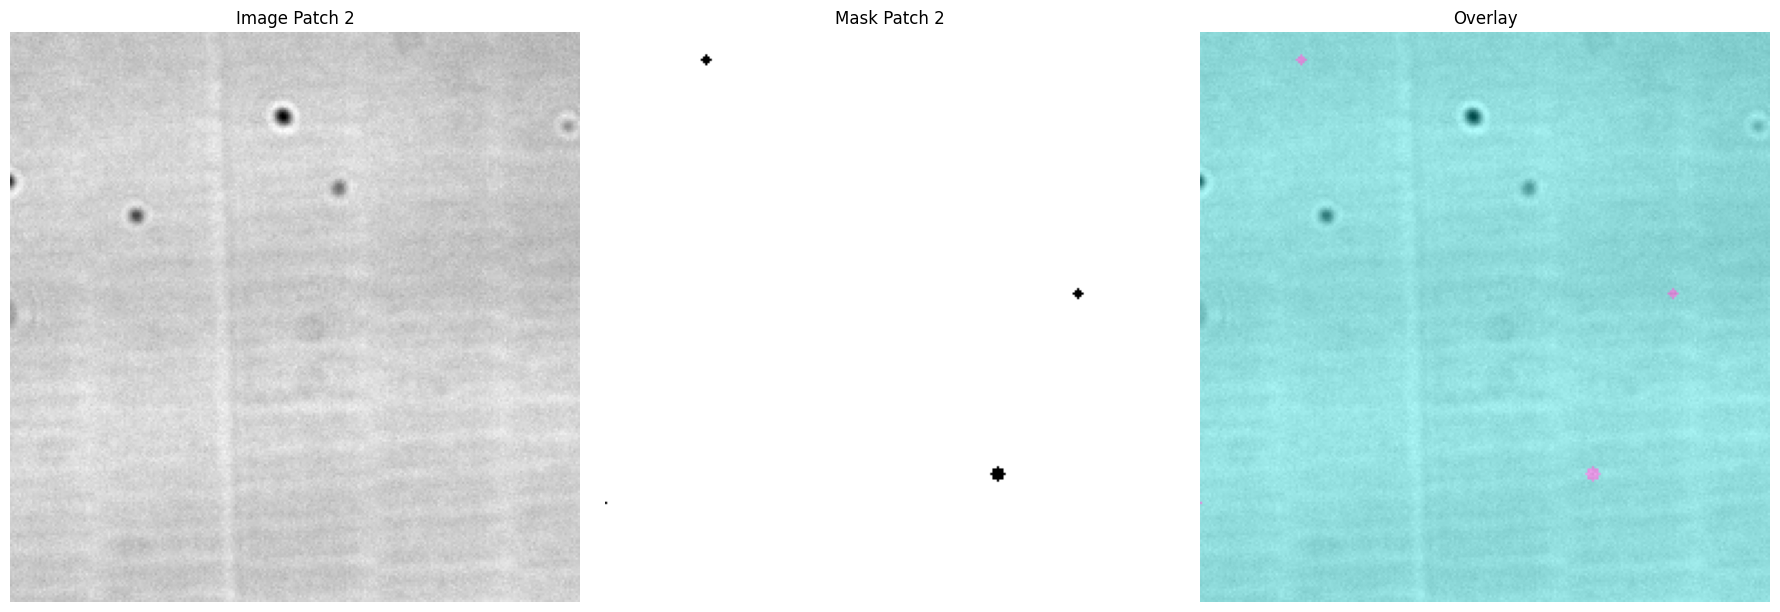

Image stats - Min: 16204, Max: 27359, Mean: 25232.42
Mask stats - Min: 0, Max: 1, Sum: 56 pixels
Percentage of mask area: 0.09%

---

Sample 3 - showing slice 100 of 201
Sample 3 - showing first mask class of 1


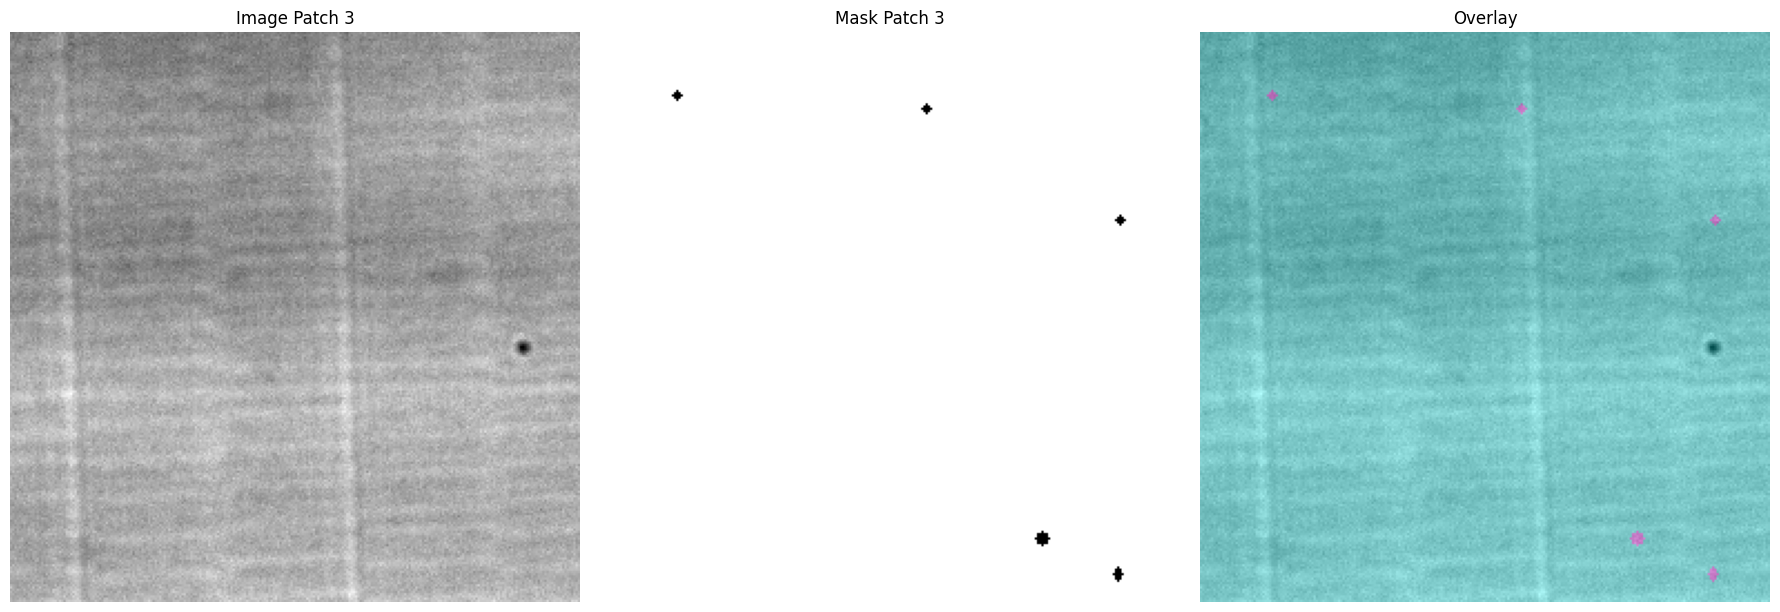

Image stats - Min: 20852, Max: 27611, Mean: 25183.00
Mask stats - Min: 0, Max: 1, Sum: 87 pixels
Percentage of mask area: 0.13%

---

Sample 4 - showing slice 100 of 201
Sample 4 - showing first mask class of 1


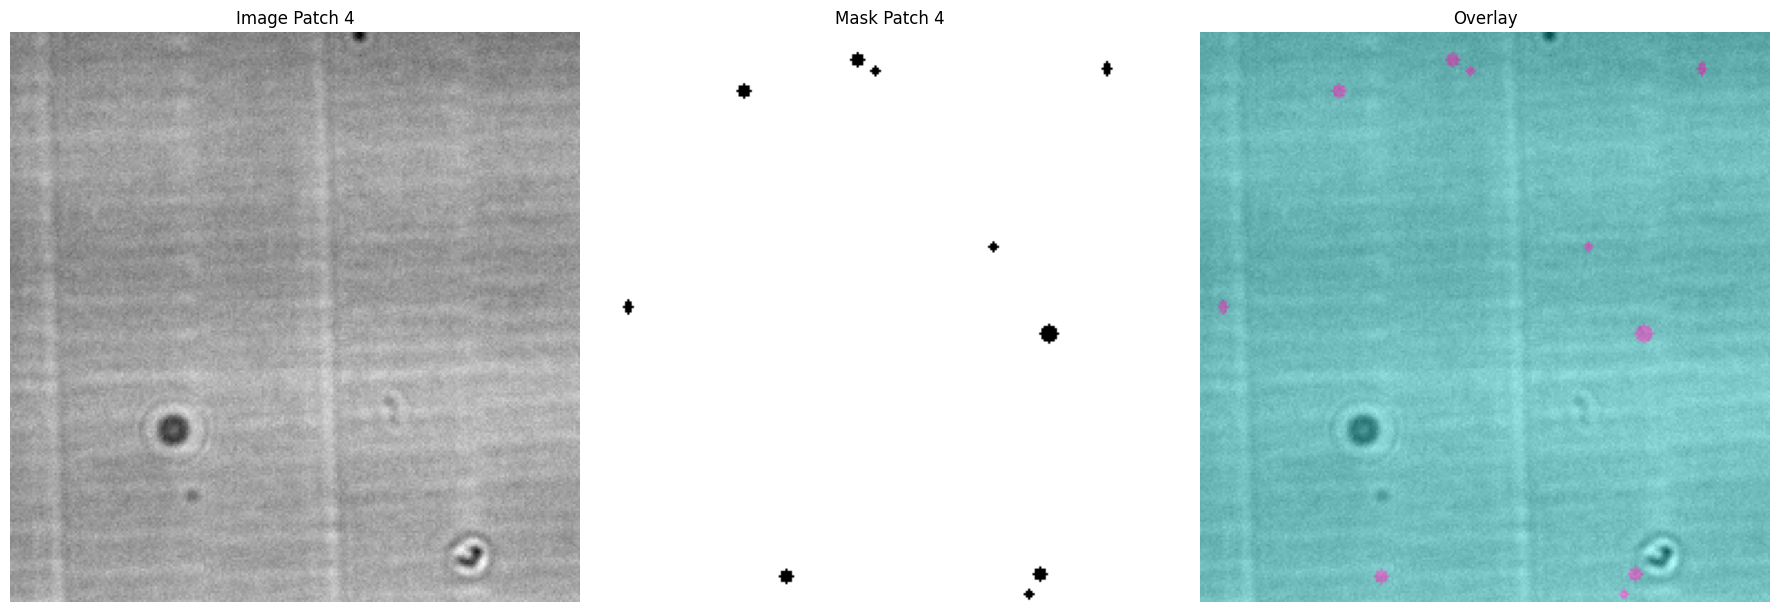

Image stats - Min: 20554, Max: 28807, Mean: 25737.52
Mask stats - Min: 0, Max: 1, Sum: 242 pixels
Percentage of mask area: 0.37%

---

Sample 5 - showing slice 100 of 201
Sample 5 - showing first mask class of 1


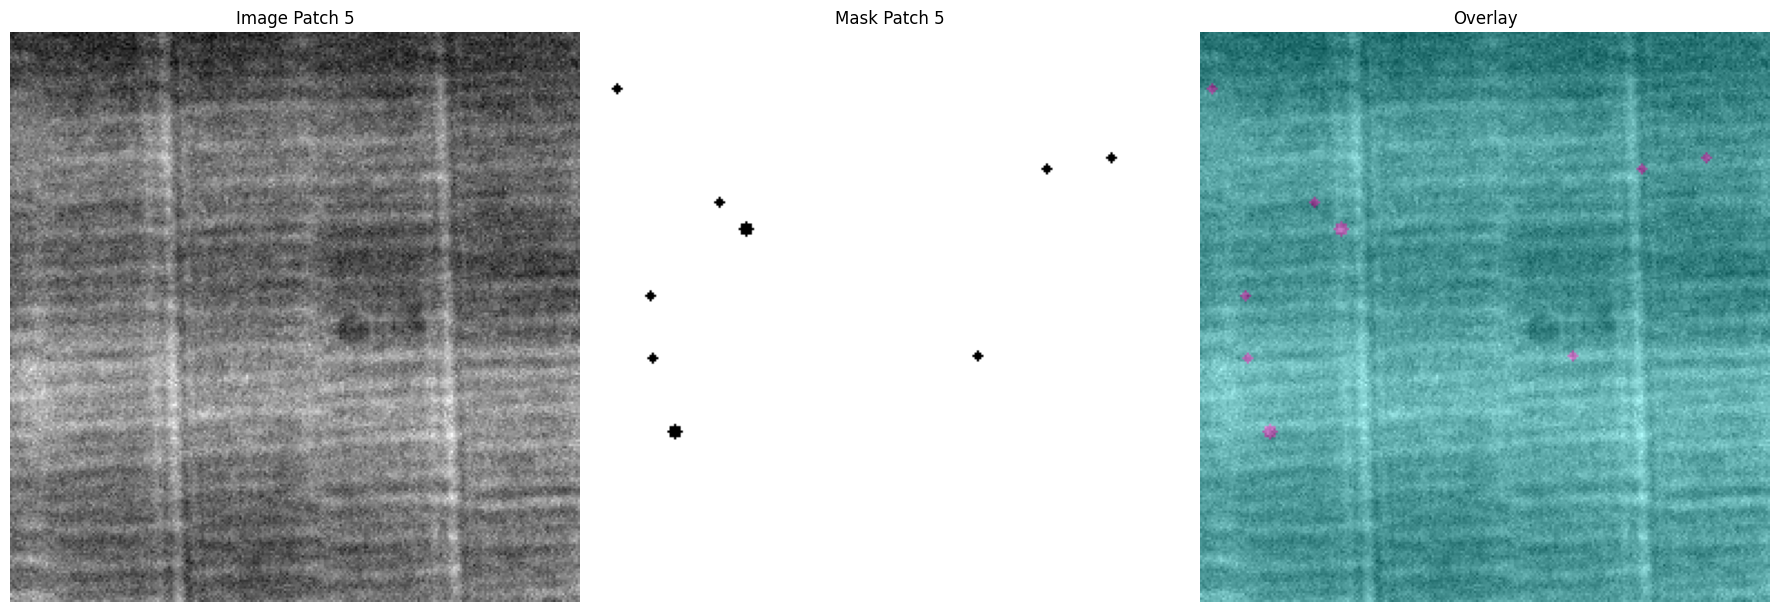

Image stats - Min: 24136, Max: 27930, Mean: 25828.83
Mask stats - Min: 0, Max: 1, Sum: 149 pixels
Percentage of mask area: 0.23%

---



In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Path to your HDF5 file - replace with your actual path
hdf5_path = "dataset/EV_brightfield.hdf5"  # Adjust this to your HDF5 file path

# Load the HDF5 file
with h5py.File(hdf5_path, 'r') as f:
    # Print metadata and dataset info for debugging
    print("HDF5 File Structure:")
    for key in f.keys():
        print(f"  Dataset: {key}, Shape: {f[key].shape}, Type: {f[key].dtype}")
    
    print("\nAttributes:")
    for attr_name, attr_value in f.attrs.items():
        print(f"  {attr_name}: {attr_value}")
    
    # Load some sample data - first few patches
    n_samples = min(5, f['image_patches'].shape[0])  # Show up to 5 samples
    
    # Load the image and mask data
    image_patches = f['image_patches'][:n_samples]
    mask_patches = f['mask_patches'][:n_samples]
    
    # Display each sample
    for i in range(n_samples):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # For image patches that are 3D (with multiple slices)
        if image_patches[i].ndim == 3:
            # Choose middle slice if there are multiple slices
            z_slice = image_patches[i].shape[0] // 2
            img = image_patches[i][z_slice]
            print(f"Sample {i+1} - showing slice {z_slice} of {image_patches[i].shape[0]}")
        else:
            img = image_patches[i]
        
        # For mask patches that have multiple classes
        if mask_patches[i].ndim > 2:
            # Just show the first class (FITC 80nm)
            mask = mask_patches[i][0]
            print(f"Sample {i+1} - showing first mask class of {mask_patches[i].shape[0]}")
        else:
            mask = mask_patches[i]
        
        # Show the image
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title(f'Image Patch {i+1}')
        axes[0].axis('off')
        
        # Show the mask
        axes[1].imshow(mask, cmap='binary')
        axes[1].set_title(f'Mask Patch {i+1}')
        axes[1].axis('off')
        
        # Show overlay
        axes[2].imshow(img, cmap='gray')
        axes[2].imshow(mask, alpha=0.3, cmap='cool')
        axes[2].set_title('Overlay')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print some basic statistics
        print(f"Image stats - Min: {img.min()}, Max: {img.max()}, Mean: {img.mean():.2f}")
        print(f"Mask stats - Min: {mask.min()}, Max: {mask.max()}, Sum: {mask.sum()} pixels")
        print(f"Percentage of mask area: {mask.sum() / (mask.shape[0] * mask.shape[1]) * 100:.2f}%")
        print("\n---\n")